# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [2]:
m = []
n = np.array([10,20,50,100,1000])

for i in n:
    m.append(main.random_matrix_Ab(i))



***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 
  

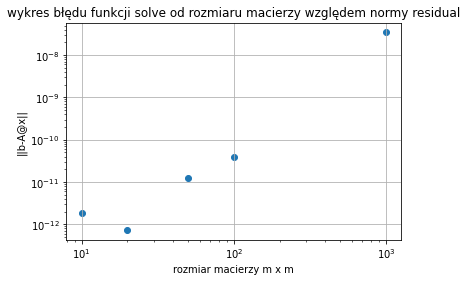

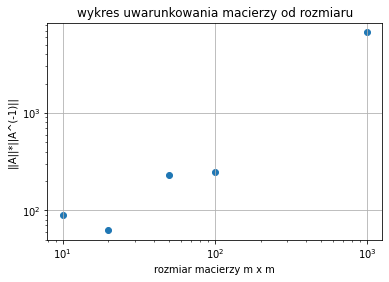

In [3]:
import numpy.linalg as linalg
norm_r = []
cond_A = []
for i in m:
    solved = linalg.solve(i[0],i[1])
    norm_r.append(main.residual_norm(i[0] , solved, i[1]))
    cond_A.append(linalg.cond(i[0]))
norm_r = np.array(norm_r)
plt.figure()
plt.yscale("log")
plt.xscale("log")
plt.scatter(n,norm_r)
plt.ylabel("||b-A@x||")
plt.xlabel("rozmiar macierzy m x m")
plt.title("wykres błędu funkcji solve od rozmiaru macierzy względem normy residual")
plt.grid()
plt.show()

######


plt.figure()
plt.ylabel("||A||*||A^(-1)||")
plt.xlabel("rozmiar macierzy m x m")
plt.title("wykres uwarunkowania macierzy od rozmiaru")
plt.yscale("log")
plt.xscale("log")
plt.scatter(n,cond_A)
plt.grid()
plt.show()



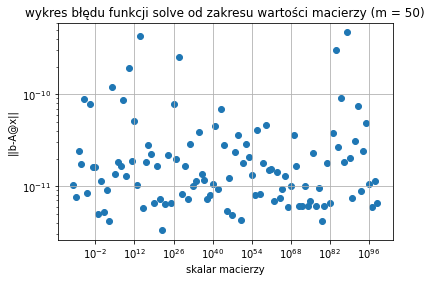

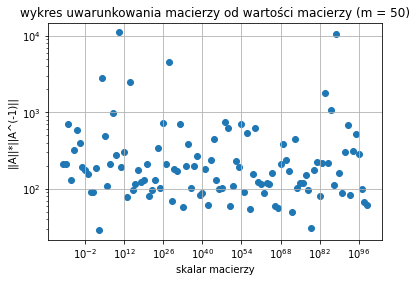

In [4]:
### cz.2
m2 = []
n2 = np.array([i for i in range(-10,100,1)])

for i in n2:
    m2.append(list(main.random_matrix_Ab(50)))
    m2[-1][0] = float(10**float(i))*m2[-1][0]
norm_r2 = []
cond_A2 = []
for i in m2:
    solved = linalg.solve(i[0],i[1])
    norm_r2.append(main.residual_norm(i[0] , solved, i[1]))
    cond_A2.append(linalg.cond(i[0]))
n3 = np.array([10**float(i) for i in n2])
norm_r = np.array(norm_r2)
plt.figure()
plt.yscale("log")
plt.xscale("log")
plt.scatter(n3,norm_r2)
plt.ylabel("||b-A@x||")
plt.xlabel("skalar macierzy")
plt.title("wykres błędu funkcji solve od zakresu wartości macierzy (m = 50)")
plt.grid()
plt.show()

######


plt.figure()
plt.ylabel("||A||*||A^(-1)||")
plt.xlabel("skalar macierzy")
plt.title("wykres uwarunkowania macierzy od wartości macierzy (m = 50)")
plt.yscale("log")
plt.xscale("log")
plt.scatter(n3,cond_A2)
plt.grid()
plt.show()

## wnioski zad. 2
4. Rozmiar macierzy ma wpływ na wartość uwarunkowania macierzy oraz na wartość normy_residum. W obydwóch przypadkach wartości są tym większe im większe są rozmiary macierzy. Rozmiary macierzy mają wpływ na jakość otrzymanych wyników ponieważ im większa macierz tym występuje większa kumulacja błędów zaokrągleń które nakładały się w trakcie dużej ilości obliczeń
5. zakres wartości macierzy nie ma znaczącego wpływu ani na normę reziduum ani na wartości uwarunkowania


***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [5]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.48074070e+00 1.29219214e-16 7.69636854e-34]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




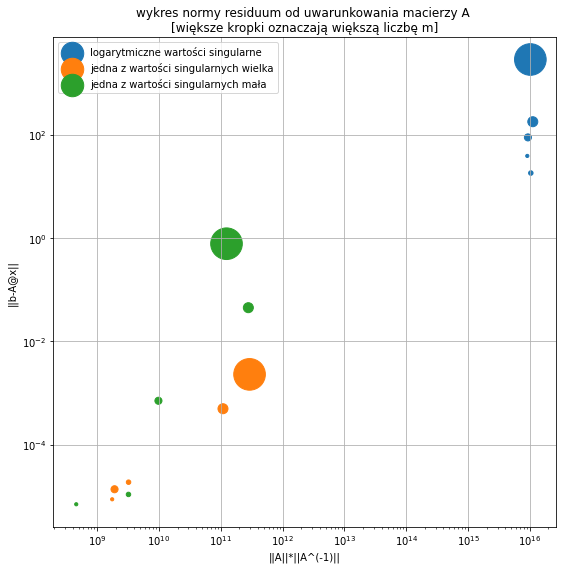

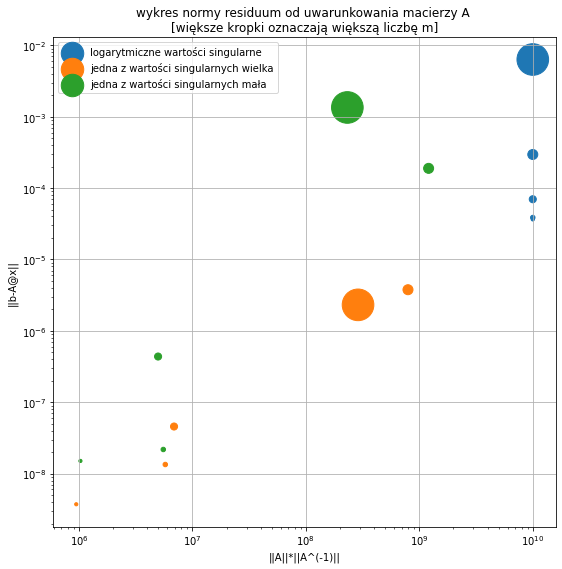

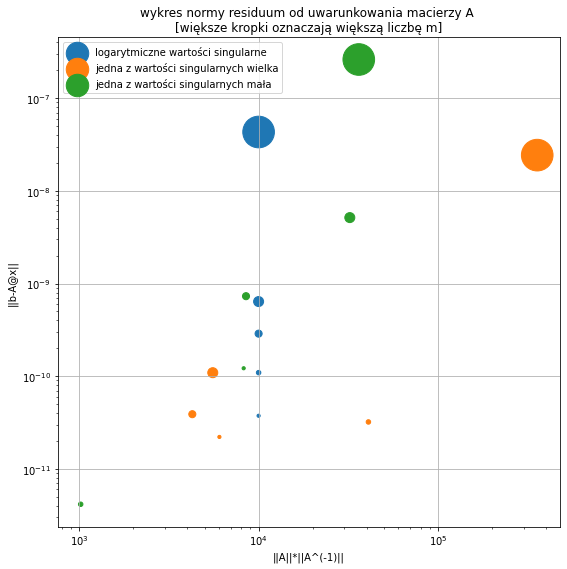

In [6]:


#### SVD
def plot(log_vect,one_max,one_min):
    log_reconstructed = []
    max_reconstructed = []
    min_reconstructed = []
    for i,value in enumerate(list(m)):
        log_reconstructed.append(main.create_matrix_from_A(value[0],log_vect[i]))
        max_reconstructed.append(main.create_matrix_from_A(value[0],one_max[i]))
        min_reconstructed.append(main.create_matrix_from_A(value[0],one_min[i]))

    cond_log_reconstructed = [linalg.cond(i) for i in log_reconstructed]
    cond_max_reconstructed = [linalg.cond(i) for i in max_reconstructed]
    cond_min_reconstructed = [linalg.cond(i) for i in min_reconstructed]

    norm_log_reconstructed = []
    norm_max_reconstructed = []
    norm_min_reconstructed = []

    for i,value in enumerate(list(m)):
        norm_log_reconstructed.append(main.residual_norm(log_reconstructed[i],linalg.solve(log_reconstructed[i],value[1]),value[1]))  
        norm_max_reconstructed.append(main.residual_norm(max_reconstructed[i],linalg.solve(max_reconstructed[i],value[1]),value[1]))
        norm_min_reconstructed.append(main.residual_norm(min_reconstructed[i],linalg.solve(min_reconstructed[i],value[1]),value[1]))

    norm = [norm_log_reconstructed,norm_max_reconstructed,norm_min_reconstructed]

    plt.figure(figsize=[9,9])
    plt.yscale("log")
    plt.xscale("log")
    plt.scatter(cond_log_reconstructed,norm_log_reconstructed, label = "logarytmiczne wartości singularne", s = n)
    plt.scatter(cond_max_reconstructed,norm_max_reconstructed, label = "jedna z wartości singularnych wielka", s = n)
    plt.scatter(cond_min_reconstructed,norm_min_reconstructed, label = "jedna z wartości singularnych mała", s = n)
    plt.title("wykres normy residuum od uwarunkowania macierzy A \n[większe kropki oznaczają większą liczbę m]")
    #plt.scatter(cond_A,norm_r, label = "zwykłe wartości singularne", s =n)
    plt.xlabel("||A||*||A^(-1)||")
    plt.ylabel("||b-A@x||")
    plt.grid()
    plt.legend()
    plt.show()
#### vectors of singulars values:
### pierwszy zestaw
log_vect = [main.log_sing_value(int(i),-8,8) for i in list(n)]
one_max = [main.order_sing_value(int(i),8,"gre") for i in list(n)]
one_min = [main.order_sing_value(int(i),-8,"low") for i in list(n)]
plot(log_vect,one_max,one_min)
### drugi zestaw
log_vect = [main.log_sing_value(int(i),-5,5) for i in list(n)]
one_max = [main.order_sing_value(int(i),5,"gre") for i in list(n)]
one_min = [main.order_sing_value(int(i),-5,"low") for i in list(n)]
plot(log_vect,one_max,one_min)
### trzeci zestaw
log_vect = [main.log_sing_value(int(i),-2,2) for i in list(n)]
one_max = [main.order_sing_value(int(i),2,"gre") for i in list(n)]
one_min = [main.order_sing_value(int(i),-2,"low") for i in list(n)]
plot(log_vect,one_max,one_min)

## Wnioski ostatnie zad.
wykresy przedstawiają zależności pomiędzy wymiarami badanych macierzy[wielkość kropek], ich współczynnikami uwarunkowania oraz ich normami residuum. z wykresów wykonanych odpowiednio dla różnych wektorów wartości singularnych można wywnioskować że im większe wymiary macierzy tym średnio większe jest jej uwarunkowanie oraz norma reziduum(podobnie jak przy macierzach o "normalnych" wartościach singularnych). dla macierzy w których jedna z wartości się znacznie wyróżnia (jest albo bardzo mała albo bardzo duża) ich "charakterystyki" w zalerzności od wymiaru macierzy są bardzo podobne lecz wartości normy residuum są średnio większe dla tych samych uwarunkowań macierzy o wartościach singularnych z wyrużniającą się bardzo małą wielkością. Jeżeli chodzi o macierze z logarytmicznym uporządkowaniem wartości singularnych to ich "charakterystyka" wyróżnia się stałym współczynnikiem uwarunkowania dla nie za dużych wartości maksymalnych (nie większych niż $10^8$ ). nie jest konieczne obliczenie układu aby określić w przybliżeniu normę residual ponieważ można policzyć wskaźnik uwarunkowania macierzy i na jego podstawie oszacować (przemnożyć przez epsilon maszynowe) błąd numeryczny rozwiązania.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

## Wnioski 
całe laboratoria mineły bezproblemowo, przy implementacji funkcji także nie było żadnych problemów. na labolatoriach miałem okazję zapoznać się z normą residum - wyznacznikowi określającego dokładność rozwiązania układu równań oraz pythonowskimi narzędziami do obliczeń ich rozwiązań oraz narzędziami do rozkładów macierzy z modułu numpy.linalg. Uważam że te ćwiczenia były ważne pod względem zapoznania się z charakterystycznymi własnościami macierzy związanymi z tematyką metod numerycznych.